In [1]:
from brian2 import *
%matplotlib inline
prefs.codegen.target = 'numpy'

/home/marcel/conda/envs/brian_tutorial/lib/python3.7/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [2]:
start_scope()

# Membrane time constant of the neuron
tau = 10*ms
# Noise strength
sigma_noise = 0.5
# stimulus parameters
theta_stim = 0.; amp_stim = 2.
# stimulus sensitivity
sigma_theta = pi/8; 
# Number of neurons
N_E = 400

# excitatory neurons
exc_neurons = NeuronGroup(N_E, '''# Noisy membrane potential (rescaled to be between 0 and 1)
                                  dv/dt = (-v + I_stim)/tau + sigma_noise*xi*tau**-0.5: 1
                                  # The neuron's preferred stimulus
                                  theta : 1 (constant)
                                  # Difference between the stimulus and the preferred stimulus
                                  # (the expression is a bit complicated to cope with a periodic
                                  # variable, e.g. -pi should be considered identical to pi)
                                  stimulus_diff = (theta - theta_stim + pi)%(2*pi) - pi : radian
                                  # Stimulus current, as a Gaussian of the stimulus difference
                                  I_stim = amp_stim*exp(-stimulus_diff**2/(2*sigma_theta)**2) : 1
                                  ''', threshold='v>1', reset='v=0',
                          method='euler')
# Initialize the membrane potential randomly
exc_neurons.v = 'rand()*0.5'
# Uniformly distribute preferred stimuli between -pi and pi
exc_neurons.theta = '-pi + 2*pi*i/N_E'

# Monitor neurons
exc_mon = SpikeMonitor(exc_neurons)

# run simulation
run(1000*ms, report='text')

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 1s


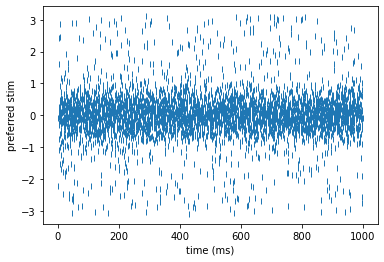

In [3]:
fig, ax = plt.subplots()
ax.plot(exc_mon.t/ms, exc_neurons.theta[exc_mon.i], '|')
ax.set(ylabel='preferred stim', xlabel='time (ms)');

## Things to explore

* Switch off the stimulus after the end of the simulation and continue the simulation
* Connect the neurons among each other with synapses. Can you get sustained activity after the stimulus switches off?
* Instead of connecting all neurons to all other neurons, connect them preferrably (or with stronger weights) to neurons with similar stimulus preference.
* Introduce an inhibitory population and connect it to the excitatory population
* Add a second stimulus or change the stimulus over time
* Be creative!